In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
import math
from typing import Optional, List
from sortedcontainers import SortedDict
from Plasma import Plasma_Evolver
from scipy import interpolate
import itertools
from Analyzer import Plasma_Analyzer, Plasma_Plotter
from numpy.fft import fft, ifft

In [4]:
N = 200
dt = 0.02
epsilon = 0.01
driver = Plasma_Evolver(N, dt, epsilon_in=epsilon, delta_in=0.05, insertion=False, d1=0.03, rk = True, N_streams=2, v0=0.1)

In [5]:
driver.evolve_plasma(10)



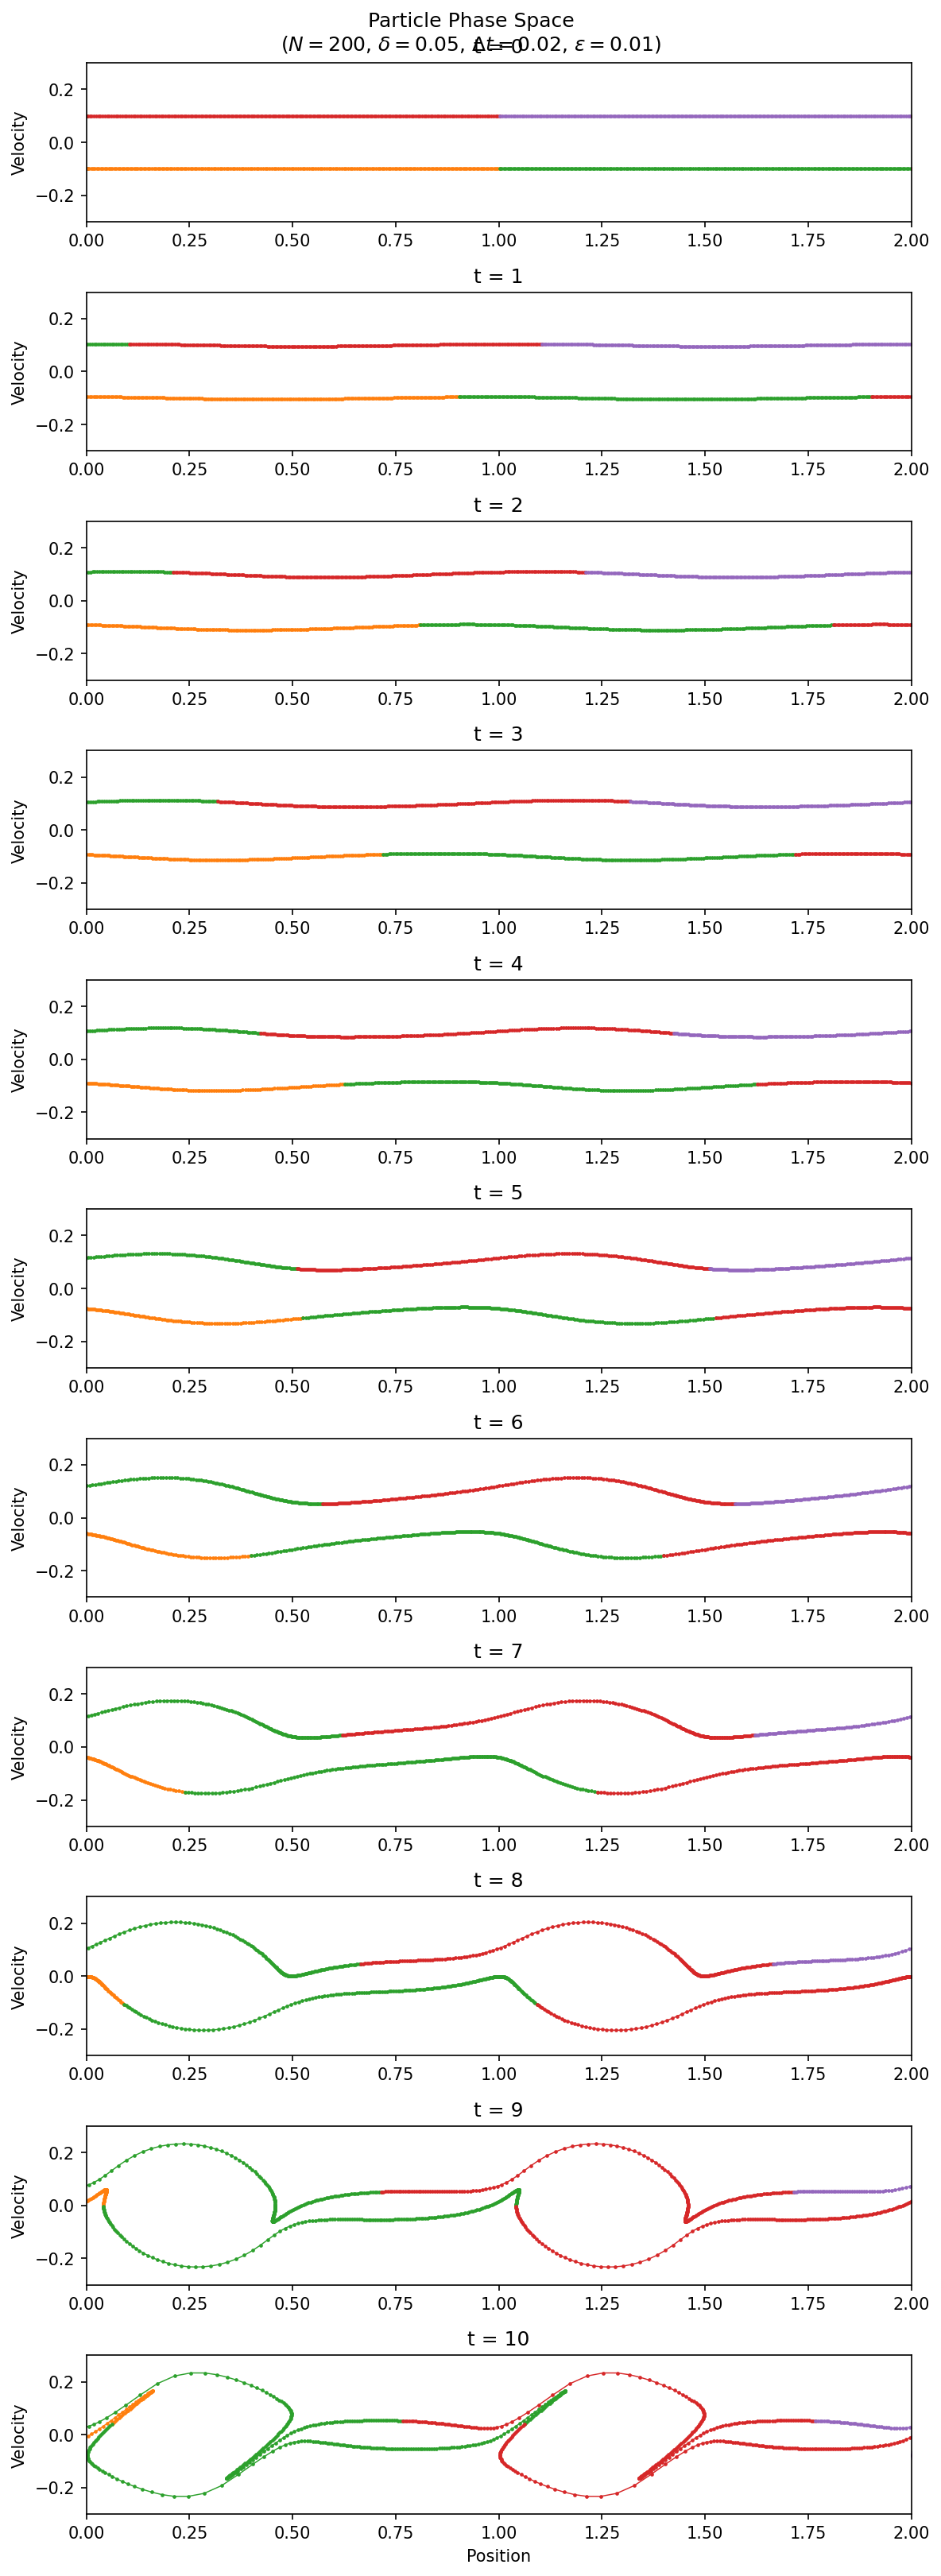

In [76]:
driver.plot_particles(periods=2, times=(0,1,2,3,4,5,6,7,8,9, 10))

In [80]:
N = 200
dt = 0.02
epsilon = 0.01
driver = Plasma_Evolver(N, dt, epsilon_in=epsilon, delta_in=0.05, insertion=False, d1=0.03, rk = True, N_streams=2, v0=0.1)

In [81]:
driver.evolve_plasma(10)

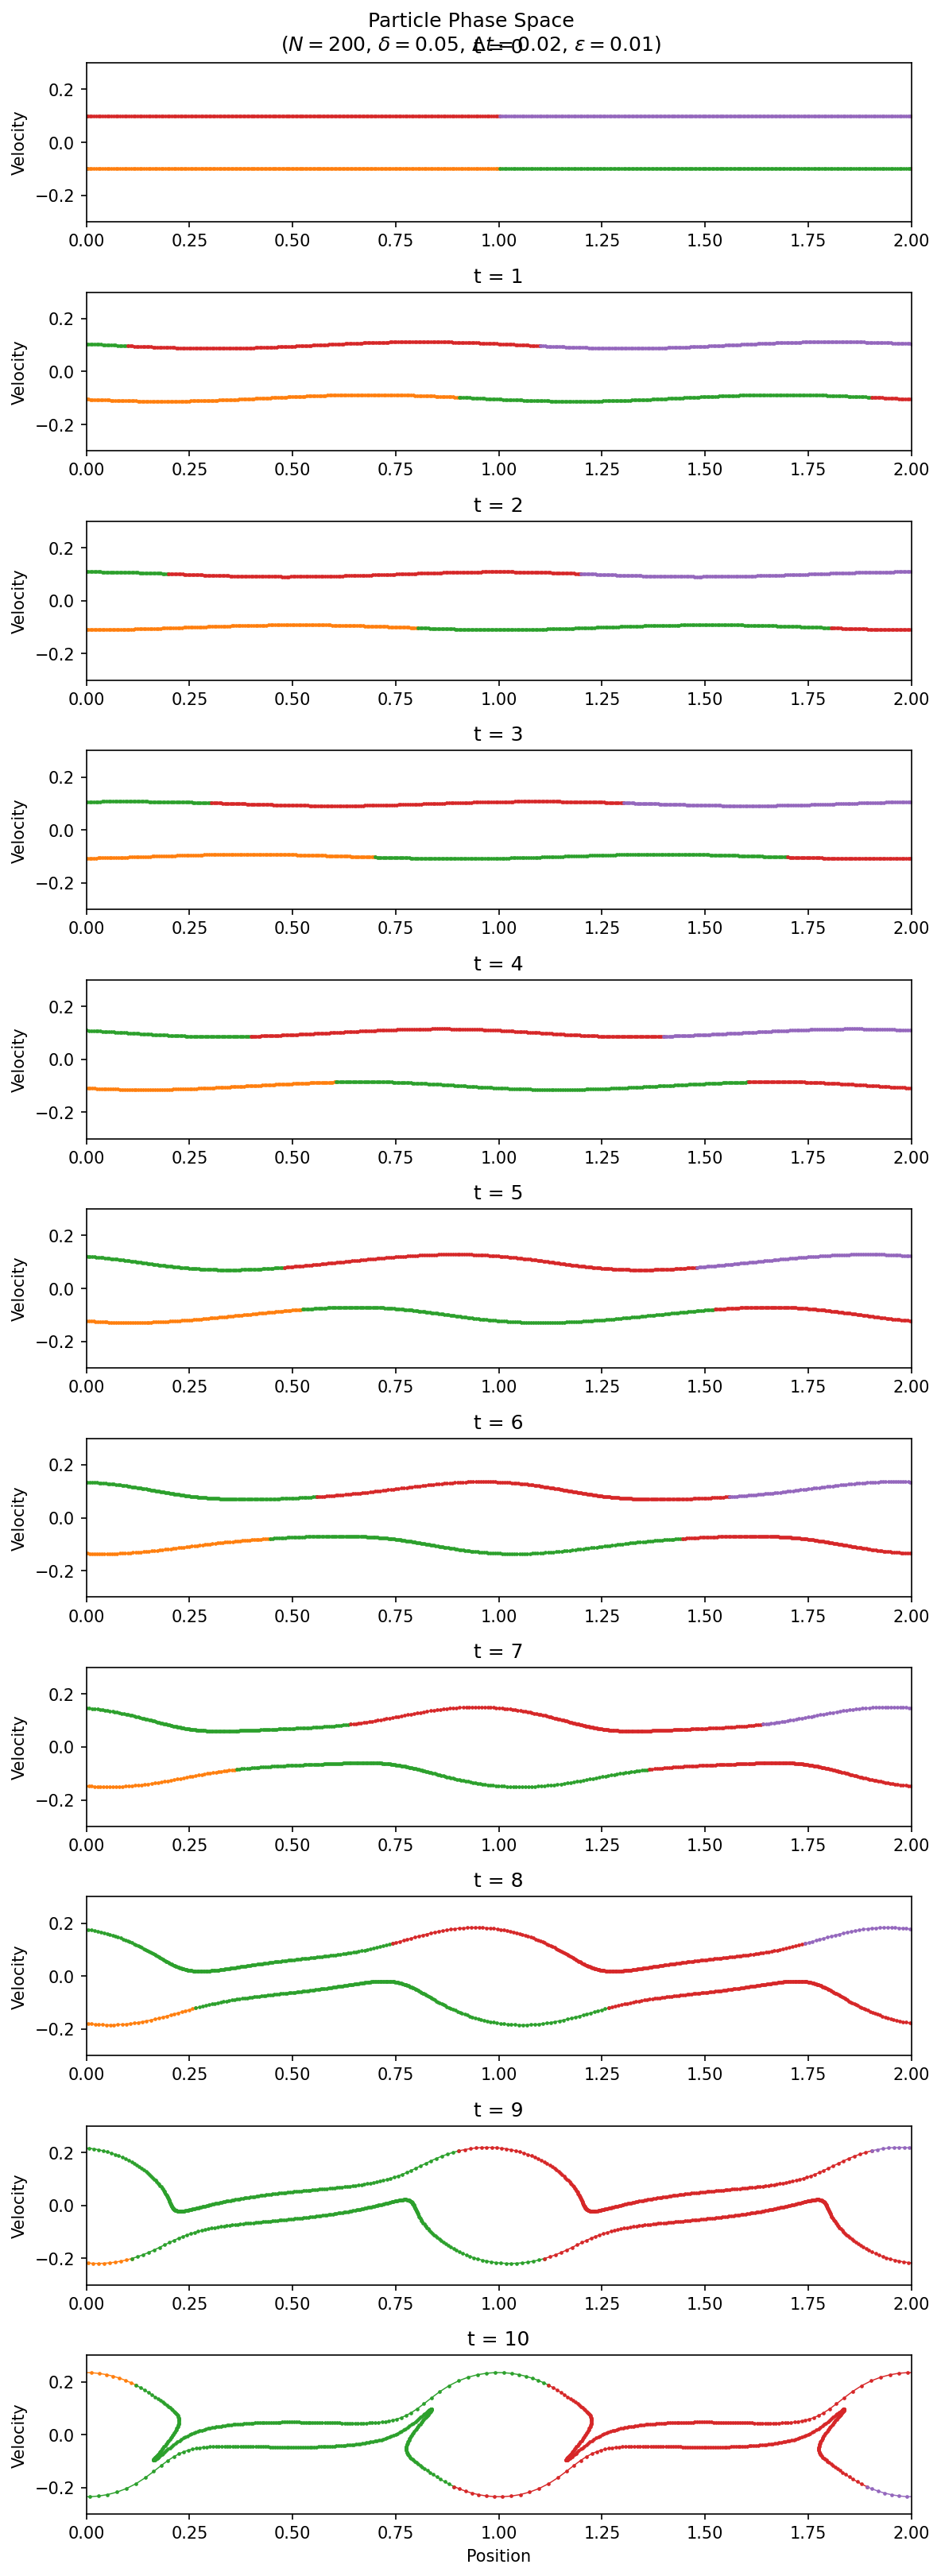

In [82]:
driver.plot_particles(periods=2, times=(0,1,2,3,4,5,6,7,8,9, 10))

SortedKeysView(SortedDict({0.003125: <Plasma.Particle object at 0x0000021A4CC21D90>, 0.009375: <Plasma.Particle object at 0x0000021A4BD81010>, 0.015625: <Plasma.Particle object at 0x0000021A551EB510>, 0.021875: <Plasma.Particle object at 0x0000021A55F78390>, 0.028125: <Plasma.Particle object at 0x0000021A55F786D0>, 0.034375: <Plasma.Particle object at 0x0000021A55F78990>, 0.040625: <Plasma.Particle object at 0x0000021A4CC5E410>, 0.046875: <Plasma.Particle object at 0x0000021A4CC5EA10>, 0.053125: <Plasma.Particle object at 0x0000021A4CC5C210>, 0.059375: <Plasma.Particle object at 0x0000021A4BDA3650>, 0.065625: <Plasma.Particle object at 0x0000021A4CC5D0D0>, 0.071875: <Plasma.Particle object at 0x0000021A4D4411D0>, 0.078125: <Plasma.Particle object at 0x0000021A4BC81410>, 0.084375: <Plasma.Particle object at 0x0000021A55F2CED0>, 0.090625: <Plasma.Particle object at 0x0000021A55F2E610>, 0.096875: <Plasma.Particle object at 0x0000021A55F30690>, 0.103125: <Plasma.Particle object at 0x000002

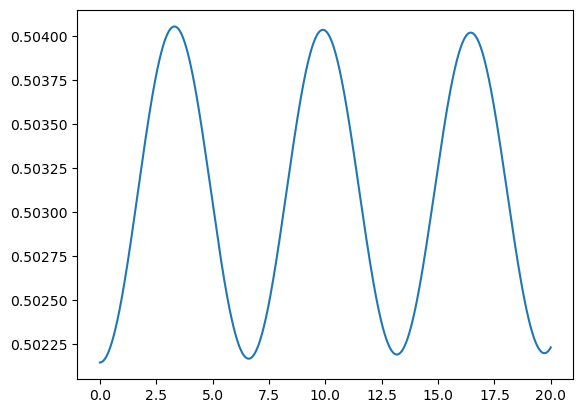

In [64]:
keys = driver.plasma[0].stream.keys()
print(keys)

p = driver.plasma[0].stream[keys[len(keys) // 2]]
print(p.alpha)
t = np.linspace(0, 20, len(p.pos_hist))

print(p.pos_hist)
x = np.array(p.pos_hist) + np.array(p.period_hist)
plt.plot(t, np.array(p.pos_hist) + np.array(p.period_hist))

In [99]:
analyzer = Plasma_Analyzer(driver)

In [111]:
times = [15,16,17,18,19,20]
times = np.linspace(0,20,5)
charges = [analyzer.calc_charge_dist(i, 50) for i in times]


In [112]:
all_charges = []

for stream_charges in charges:

    for stream in stream_charges:

        all_charges.append(stream[1])

#ceiling = np.amax(all_charges)
maxs = []
for l in all_charges:
    maxs.append(max(l))
ceiling = max(maxs)

print(ceiling)

0.11000000000000003


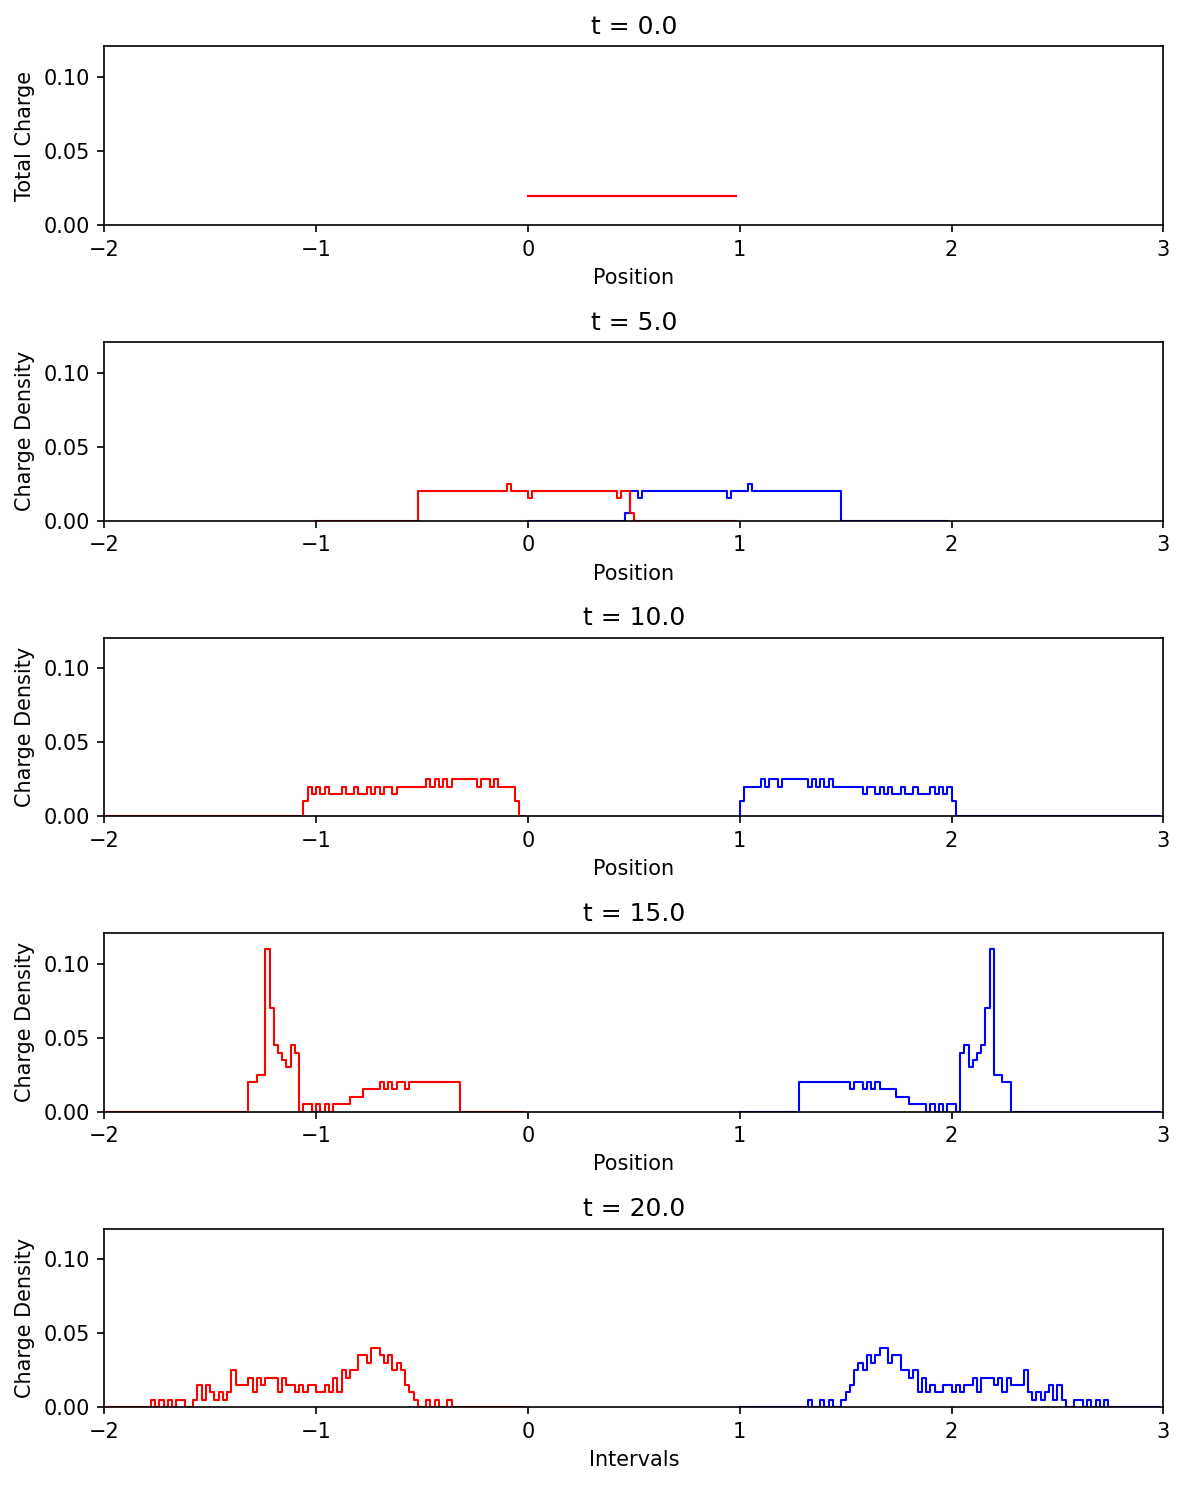

In [113]:

custom_xlim = (-2, 3)
custom_ylim = (0, 1.1 * ceiling)

fig, axs = plt.subplots(len(charges),1,figsize=(8,2*len(charges)), dpi=150)

plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)

colors = ('b','r')


for stream_charges, ax, t in zip(charges, axs, times):

    for i, stream in enumerate(stream_charges):
        ax.set_title(r"t = {}".format(t))
        ax.set_ylabel("Charge Density")
        ax.set_xlabel("Position")
        ax.step(stream[0],stream[1], alpha=1, c=colors[i], linewidth=1)

axs[-1].set_xlabel('Intervals')
axs[0].set_ylabel('Total Charge')
#fig.suptitle('Charge Density')
fig.tight_layout()
plt.show()

In [13]:
def abs_key(num):
    return abs(num)

# Example usage:
my_list = range(-5, 6)

sorted_list = sorted(my_list, key=lambda x: abs(x))
print(sorted_list)

[0, -1, 1, -2, 2, -3, 3, -4, 4, -5, 5]


<generator object Plasma_Plotter.plot_phase_space.<locals>.<genexpr> at 0x000002AA3E94D300>
1.1202831454130238
2.1202831454130235
range(-2, 1)
-1.1082178357473507
-0.10821783574735067
range(0, 4)


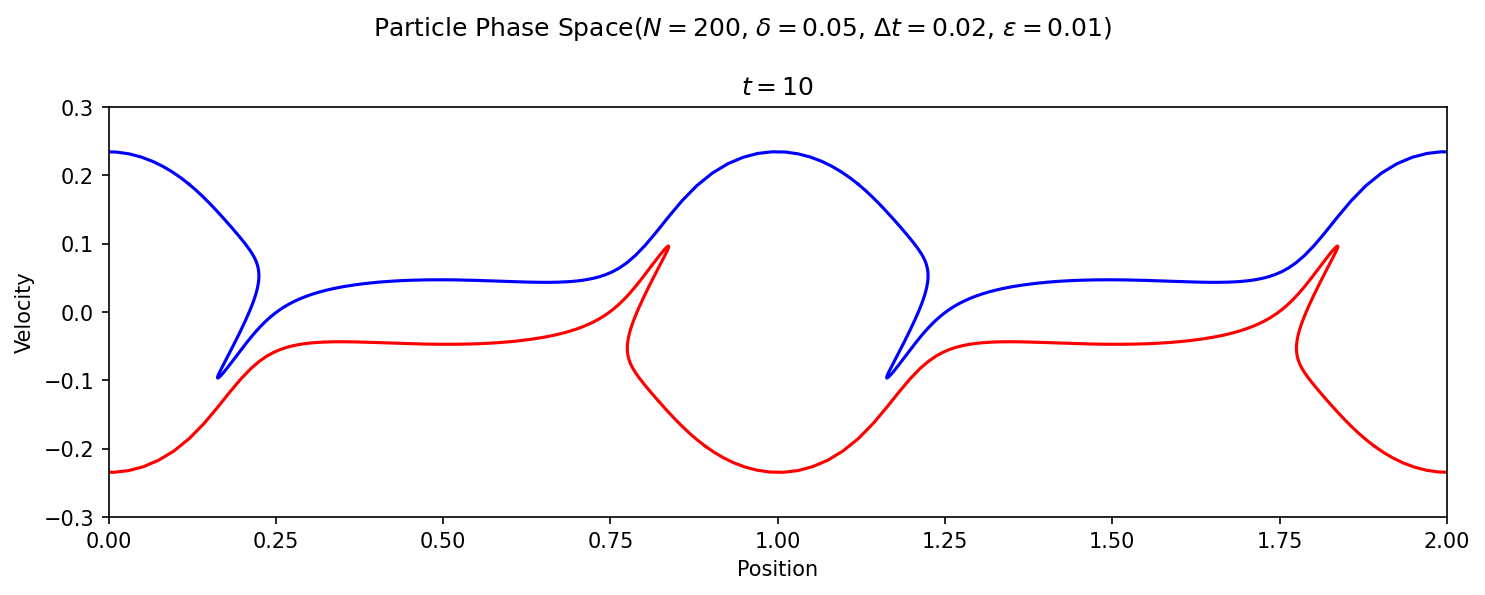

: 

In [29]:
plotter = Plasma_Plotter(driver)

plotter.plot_phase_space(periods=2, times=(10,),markers_on=False)